#📌 Extracão

In [ ]:
!pip install pandas
!pip install matplotlib seaborn
!pip install numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [ ]:
df = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json')
df.head()

#🔧 Transformação

In [ ]:
df_norm_customer  = pd.json_normalize(df['customer'])
df_norm_internet  = pd.json_normalize(df['internet'])
df_norm_phone  = pd.json_normalize(df['phone'])
df_norm_account = pd.json_normalize(df['account'])

df_normalizado = pd.concat([df[['customerID', 'Churn']], df_norm_customer, df_norm_phone, df_norm_internet , df_norm_account], axis=1)
display(df_normalizado.head())   


In [ ]:
df_normalizado[['Churn', 'SeniorCitizen','gender','Partner','Dependents','PhoneService','MultipleLines','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']] = df_normalizado[['Churn','SeniorCitizen' , 'gender','Partner','Dependents','PhoneService','MultipleLines','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']].astype('category')
df_normalizado.info()

In [ ]:
new_column_names = {
    'tenure': 'Ternure',
    'Charges.Monthly': 'ChargesMonthly',
    'Charges.Total': 'ChargesTotal',
    'gender': 'Gender'
}

df_normalizado = df_normalizado.rename(columns=new_column_names)

display(df_normalizado.head())

In [ ]:
print("Valores Ausentes:")
print(df_normalizado.isnull().sum())

print("\nLinhas Duplicadas:")
print(df_normalizado.duplicated().sum())


print("\nVerificando Inconsistências em Colunas Categóricas:")
categorical_cols = df_normalizado.select_dtypes(include='category').columns
for col in categorical_cols:
    print(f"\nColuna: {col}")
    print(df_normalizado[col].value_counts())

object_cols = df_normalizado.select_dtypes(include='object').columns
print("\nVerificando Inconsistências em Colunas de Objeto:")
for col in object_cols:
    print(f"\nColuna: {col}")
    print(df_normalizado[col].value_counts())

In [ ]:
import numpy as np


df_normalizado['ChargesTotal'] = df_normalizado['ChargesTotal'].replace(' ', np.nan)
df_normalizado['ChargesTotal'] = pd.to_numeric(df_normalizado['ChargesTotal'])
df_normalizado['ChargesTotal'] = df_normalizado['ChargesTotal'].fillna(0)

df_normalizado['Churn'] = df_normalizado['Churn'].replace('', np.nan)
df_normalizado['Churn'] = df_normalizado['Churn'].fillna('No')


df_normalizado[col] = df_normalizado.apply(
   lambda row: 'No' if row['InternetService'] == 'No' and row[col] == 'No internet service' else row[col],
        axis=1
    )

df_normalizado[col] = df_normalizado.apply(
    lambda row: 'No' if row['PhoneService'] == 'No' and row[col] == 'No phone service' else row[col],
            axis=1
        )



print("Verificação após a correção:")
print("\nValores Ausentes:")
print(df_normalizado.isnull().sum())

print("\nVerificando Inconsistências em Colunas Categóricas (após correção):")
categorical_cols = df_normalizado.select_dtypes(include='category').columns
for col in categorical_cols:
    print(f"\nColuna: {col}")
    print(df_normalizado[col].value_counts())

print("\nVerificando Inconsistências em Colunas de Objeto (após correção):")
object_cols = df_normalizado.select_dtypes(include='object').columns
for col in object_cols:
    print(f"\nColuna: {col}")
    print(df_normalizado[col].value_counts())


print("\nVerificando a coluna Churn após preencher NaNs:")
print(df_normalizado['Churn'].value_counts()) 

In [ ]:
df_normalizado['Contas_Diarias'] = df_normalizado['ChargesMonthly'] / 30
display(df_normalizado.head())

In [12]:
coluna_nomes = df_normalizado.columns.tolist()
nomes_traduzidos = ['customerID',
'Rotatividade',
'Sexo',
'Idoso',
'Parceiro',
'Dependentes',
'Termo',
'Serviço Telefônico',
'Várias Linhas',
'Serviço de Internet',
'Segurança Online',
'Backup Online',
'Proteção do Dispositivo',
'Suporte Técnico',
'Streaming de TV',
'Streaming de Filmes',
'Contrato',
'Faturamento Eletrônico',
'Forma de Pagamento',
'Cobrança Mensal',
'Cobrança Total',
'Contas_Diárias']


In [13]:
dic_rename = dict(zip(coluna_nomes, nomes_traduzidos))

df_normalizado = df_normalizado.rename(columns=dic_rename)

print("\nNovos nomes das colunas:")
print(df_normalizado.columns.tolist())


Novos nomes das colunas:
['customerID', 'Rotatividade', 'Sexo', 'Idoso', 'Parceiro', 'Dependentes', 'Termo', 'Serviço Telefônico', 'Várias Linhas', 'Serviço de Internet', 'Segurança Online', 'Backup Online', 'Proteção do Dispositivo', 'Suporte Técnico', 'Streaming de TV', 'Streaming de Filmes', 'Contrato', 'Faturamento Eletrônico', 'Forma de Pagamento', 'Cobrança Mensal', 'Cobrança Total', 'Contas_Diárias']


In [14]:
df_normalizado.columns = df_normalizado.columns.str.replace(' ', '_')
print(df_normalizado.columns.tolist())

['customerID', 'Rotatividade', 'Sexo', 'Idoso', 'Parceiro', 'Dependentes', 'Termo', 'Serviço_Telefônico', 'Várias_Linhas', 'Serviço_de_Internet', 'Segurança_Online', 'Backup_Online', 'Proteção_do_Dispositivo', 'Suporte_Técnico', 'Streaming_de_TV', 'Streaming_de_Filmes', 'Contrato', 'Faturamento_Eletrônico', 'Forma_de_Pagamento', 'Cobrança_Mensal', 'Cobrança_Total', 'Contas_Diárias']


In [ ]:
replacements_across_cols = {
    'Rotatividade': {
        'Yes': 1,
        'No': 0
    },

    'Parceiro': {
        'Yes': 1, 'No': 0
    },

    'Dependentes': {
        'Yes': 1, 'No': 0
    },

    'Serviço_Telefônico': {
        'Yes': 1, 'No': 0
    },

    'Várias_Linhas': {
        'Yes': 1, 'No': 0
    },

    'Serviço_Telefônico': {
        'Yes': 1, 'No': 0
    },

    'Proteção_do_Dispositivo': {
        'Yes': 1, 'No': 0
    },

    'Suporte_Técnico': {
        'Yes': 1, 'No': 0
    },

    'Streaming_de_TV': {
        'Yes': 1, 'No': 0
    },

    'Streaming_de_Filmes': {
        'Yes': 1, 'No': 0
    },

    'Faturamento_Eletrônico': {
        'Yes': 1, 'No': 0
    },
    

   
}


df_normalizado = df_normalizado.replace(replacements_across_cols)
df_normalizado.head(10)

#📊 Carga e análise

In [ ]:
print("\nAnálise Descritiva para Colunas Numéricas:")
print(df_normalizado.describe())

print("\nAnálise Descritiva para Colunas Categóricas:")
print(df_normalizado.select_dtypes(include='category').describe())
 
print("\nContagem de Valores para Colunas Categóricas Chave:")
for col in ['Rotatividade', 'Sexo', 'Parceiro', 'Dependentes', 'Serviço_Telefônico', 'Contrato', 'Forma_de_Pagamento']:
    print(f"\nColuna: {col}")
    print(df_normalizado[col].value_counts(normalize=True) * 100) 

print("\nMatriz de Correlação:")
print(df_normalizado.corr(numeric_only=True))

print("\nAnálise Descritiva por Rotatividade:")
print(df_normalizado.groupby('Rotatividade')[['Termo', 'Cobrança_Mensal', 'Cobrança_Total', 'Contas_Diárias']].mean())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

rotatividade_counts = df_normalizado['Rotatividade'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=rotatividade_counts.index, y=rotatividade_counts.values, hue=rotatividade_counts.index, palette='tab10', legend=False)
plt.title('Distribuição da Rotatividade (Churn)')
plt.xlabel('Rotatividade')
plt.ylabel('Número de Clientes')
plt.show()

print("\nProporção de Clientes por Rotatividade:")
print(df_normalizado['Rotatividade'].value_counts(normalize=True) * 100)

Distribuição de Clientes que Cancelaram por Variáveis Categóricas:


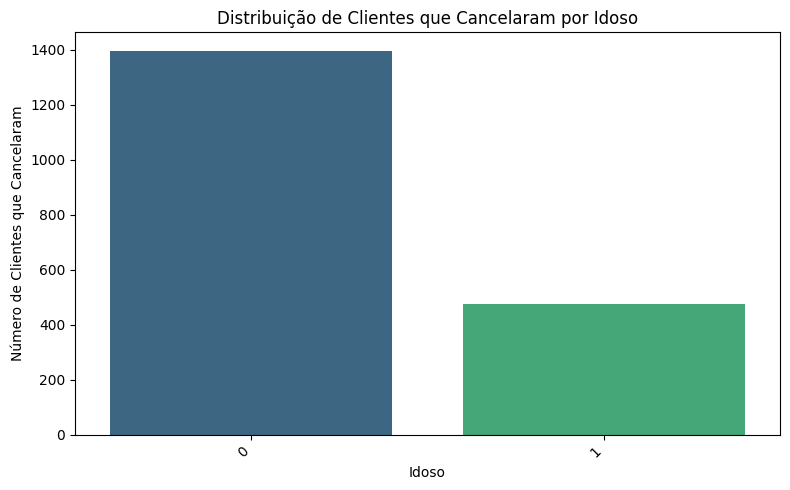

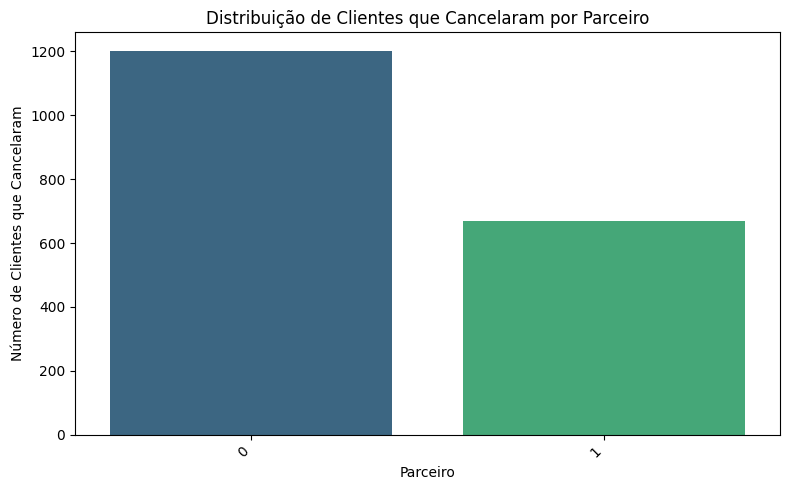

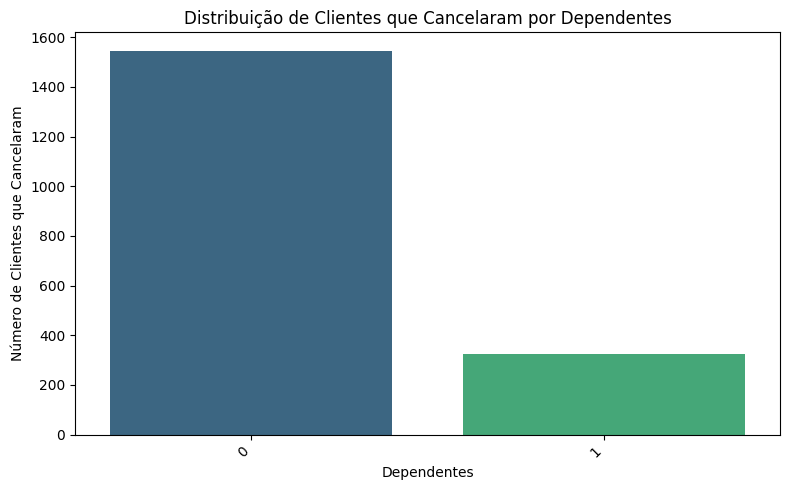

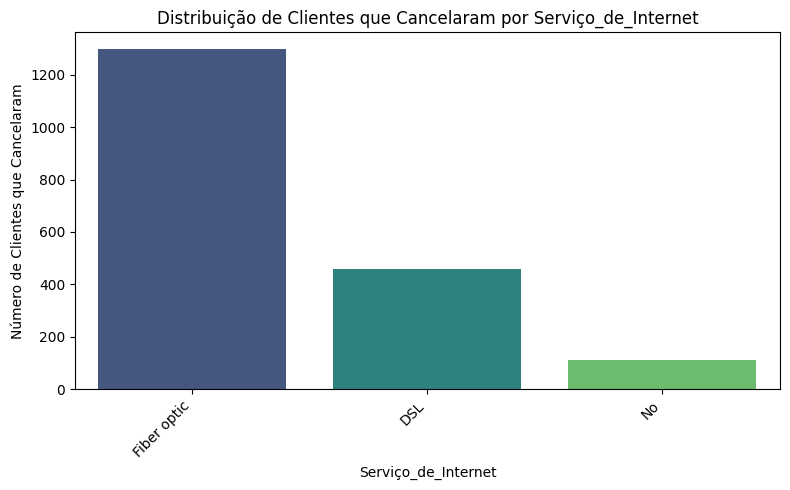

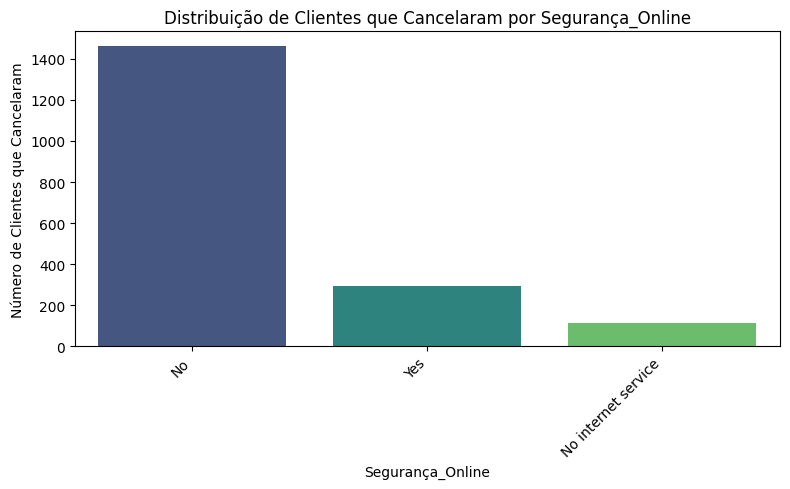

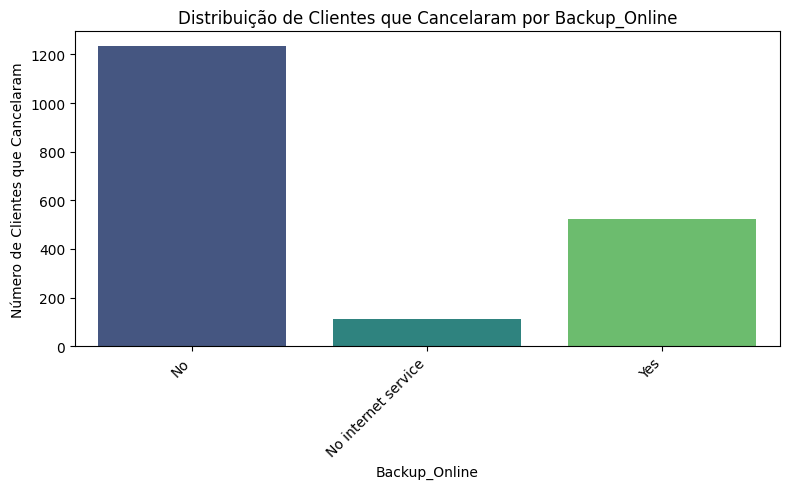

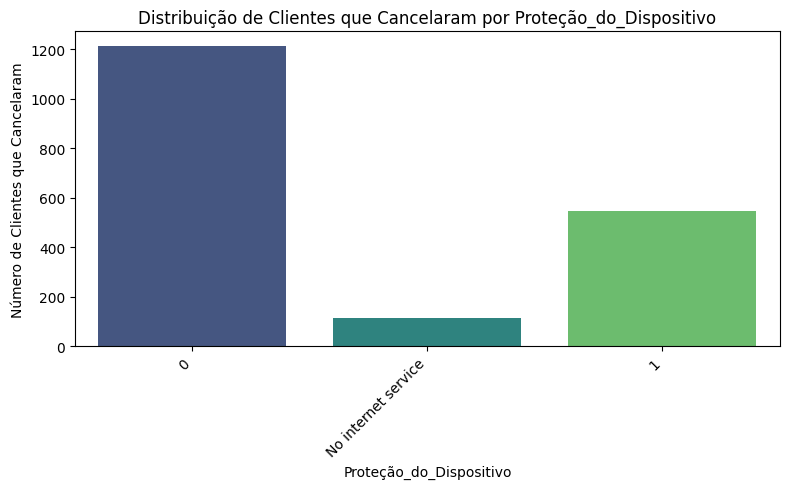

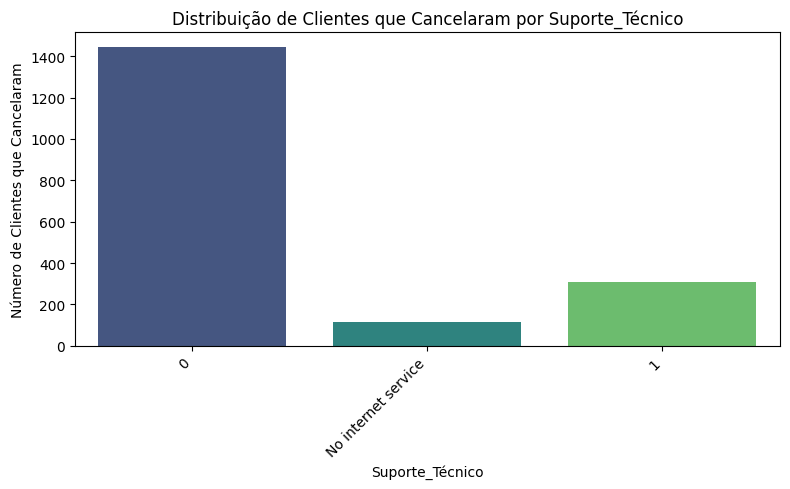

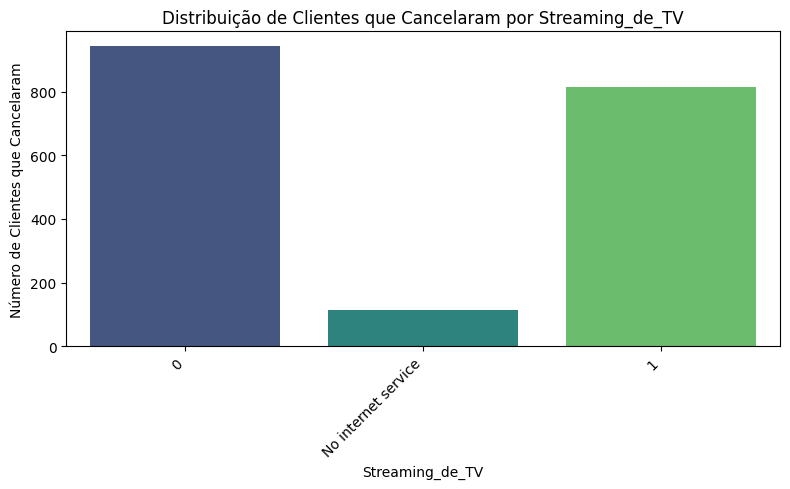

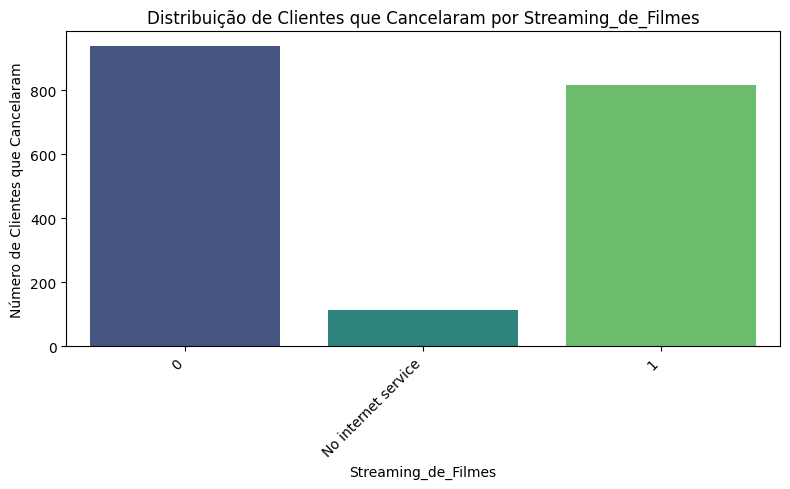

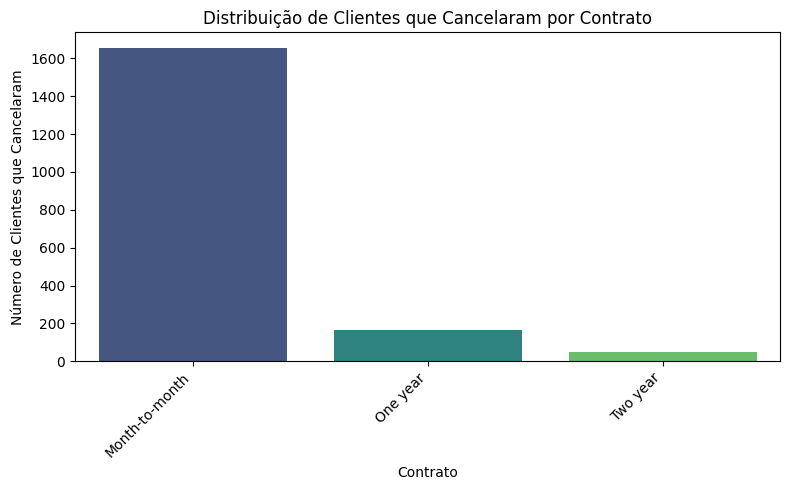

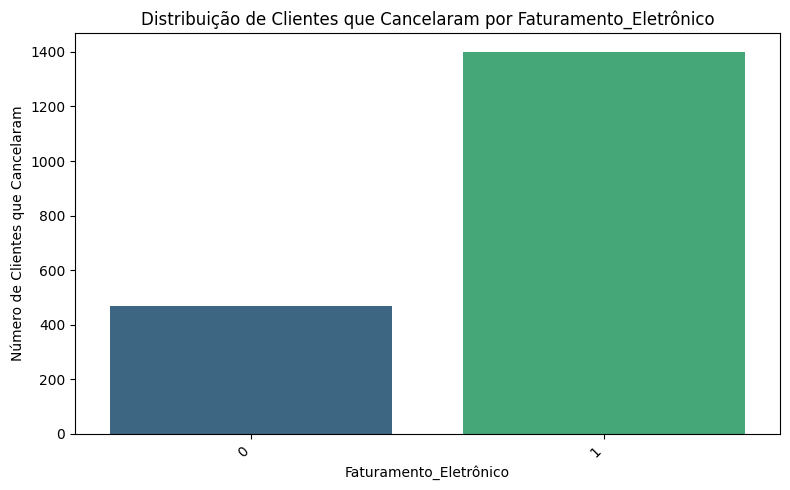

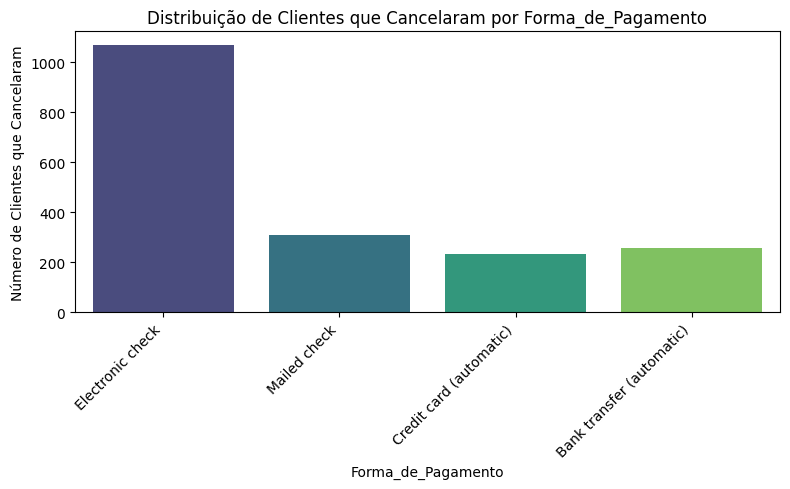

In [21]:
rotatividade_clientes = df_normalizado[df_normalizado['Rotatividade'] == 1]

colunas_categoricas = ['Idoso', 'Parceiro', 'Dependentes', 'Serviço_de_Internet','Segurança_Online','Backup_Online','Proteção_do_Dispositivo','Suporte_Técnico','Streaming_de_TV','Streaming_de_Filmes',
                                'Contrato', 'Faturamento_Eletrônico', 'Forma_de_Pagamento']

print("Distribuição de Clientes que Cancelaram por Variáveis Categóricas:")
for col in colunas_categoricas:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=rotatividade_clientes, x=col, palette='viridis', legend=False, hue=col)
    plt.title(f'Distribuição de Clientes que Cancelaram por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes que Cancelaram')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#📄Relatorio Final